<a href="https://colab.research.google.com/github/Goatboy2045/d20/blob/main/r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from matplotlib import pyplot as plt
from IPython.display import Image
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/r/df.xlsx')
df

,Product,urea,95% Full Cure 120 C minutes,Tg,Viscosity Initial,Viscosity 2x weeks
0,Omicure U-410,1,27,132,370,13
1,Omicure U-410,3,18,123,480,10
2,Omicure U-410,5,11,116,600,8
3,Omicure U-52,1,47,133,370,136
4,Omicure U-52,3,27,127,390,60
5,Omicure U-52,5,20,119,420,55
6,Omicure U-24,1,34,134,390,13
7,Omicure U-24,3,20,127,430,10
8,Omicure U-24,5,14,117,470,9
9,Omicure U-405,1,43,132,310,20


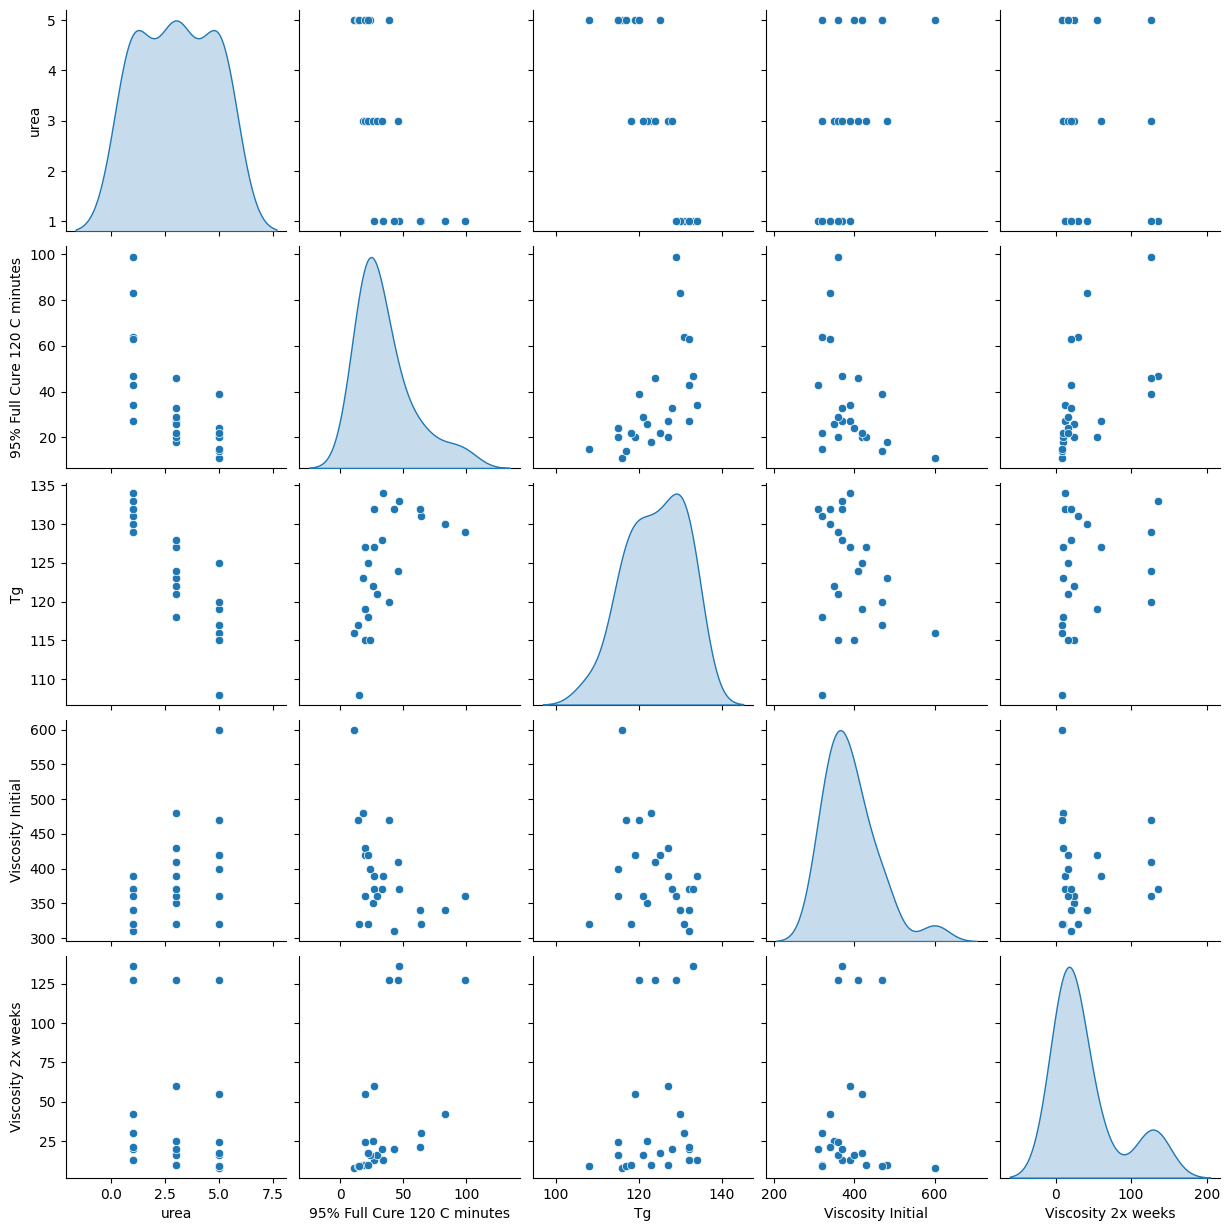

In [ ]:
sns.pairplot(df, diag_kind='kde')
plt.show()

<Axes: >

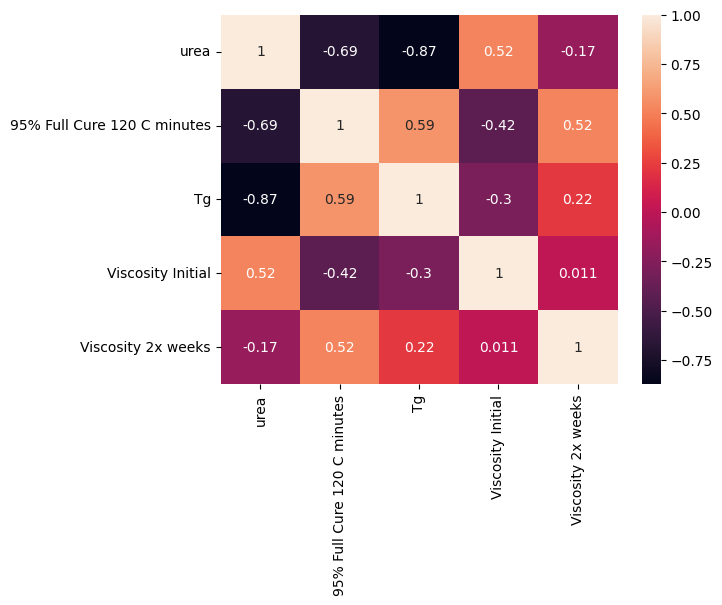

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

In [ ]:
df = df.drop(df.index[[3,21, 22,23]])
df = df.drop(['urea'], axis=1)
df


,Product,95% Full Cure 120 C minutes,Tg,Viscosity Initial,Viscosity 2x weeks
0,Omicure U-410,27,132,370,13
1,Omicure U-410,18,123,480,10
2,Omicure U-410,11,116,600,8
4,Omicure U-52,27,127,390,60
5,Omicure U-52,20,119,420,55
6,Omicure U-24,34,134,390,13
7,Omicure U-24,20,127,430,10
8,Omicure U-24,14,117,470,9
9,Omicure U-405,43,132,310,20
10,Omicure U-405,22,118,320,10


<Axes: >

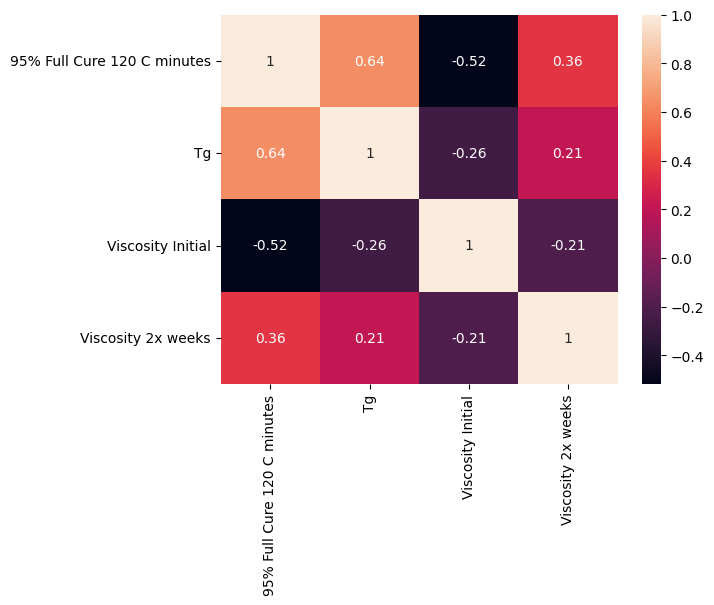

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

In [ ]:
df.columns

Index(['Product', '95% Full Cure 120 C minutes', 'Tg', 'Viscosity Initial',
       'Viscosity 2x weeks'],
      dtype='object')

In [ ]:
L = [4,14]
train_data = df.drop(['Product','Viscosity 2x weeks'], axis=1)
train_data = train_data.drop(df.index[L])
train_data.shape

(18, 3)

In [ ]:
test_data = df.drop(['Product','Viscosity 2x weeks'], axis=1)

test_data = test_data.iloc[L]
test_data

,95% Full Cure 120 C minutes,Tg,Viscosity Initial
5,20,119,420
15,63,132,340


In [ ]:
train_targets = df.drop(df.index[L])
train_targets = train_targets['Viscosity 2x weeks'].to_numpy()

train_targets


array([13, 10,  8, 60, 13, 10,  9, 20, 10,  9, 30, 25, 24, 16, 16, 42, 20,
       17])

In [ ]:
test_targets = df.iloc[L]
test_targets = test_targets['Viscosity 2x weeks'].to_numpy()
test_targets

array([55, 21])

In [ ]:

train_data = train_data.to_numpy()
train_data = train_data.astype('float64')
train_data

array([[ 27., 132., 370.],
       [ 18., 123., 480.],
       [ 11., 116., 600.],
       [ 27., 127., 390.],
       [ 34., 134., 390.],
       [ 20., 127., 430.],
       [ 14., 117., 470.],
       [ 43., 132., 310.],
       [ 22., 118., 320.],
       [ 15., 108., 320.],
       [ 64., 131., 320.],
       [ 26., 122., 350.],
       [ 20., 115., 360.],
       [ 29., 121., 360.],
       [ 24., 115., 400.],
       [ 83., 130., 340.],
       [ 33., 128., 370.],
       [ 22., 125., 420.]])

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std
train_data

array([[-0.14566301,  1.20299708, -0.26865931],
       [-0.65865013, -0.0543289 ,  1.29588606],
       [-1.05764011, -1.03224911,  3.00266282],
       [-0.14566301,  0.50448265,  0.01580349],
       [ 0.25332697,  1.48240285,  0.01580349],
       [-0.54465299,  0.50448265,  0.58472908],
       [-0.8866444 , -0.89254622,  1.15365466],
       [ 0.76631409,  1.20299708, -1.12204769],
       [-0.43065585, -0.75284333, -0.97981629],
       [-0.82964583, -2.1498722 , -0.97981629],
       [ 1.96328403,  1.06329419, -0.97981629],
       [-0.20266158, -0.19403179, -0.5531221 ],
       [-0.54465299, -1.17195199, -0.4108907 ],
       [-0.03166587, -0.33373467, -0.4108907 ],
       [-0.31665872, -1.17195199,  0.15803489],
       [ 3.04625684,  0.92359131, -0.6953535 ],
       [ 0.1963284 ,  0.64418553, -0.26865931],
       [-0.43065585,  0.22507687,  0.44249768]])

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [ ]:
k = 3
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2


In [ ]:
all_scores

[11.116294860839844, 6.255338191986084, 10.24510669708252]

In [ ]:
np.mean(all_scores)

9.205579916636148

Saving the validation logs at each fold

In [ ]:
num_epochs = 200
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2


Building the history of successive mean K-fold validation scores

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Plotting validation scores

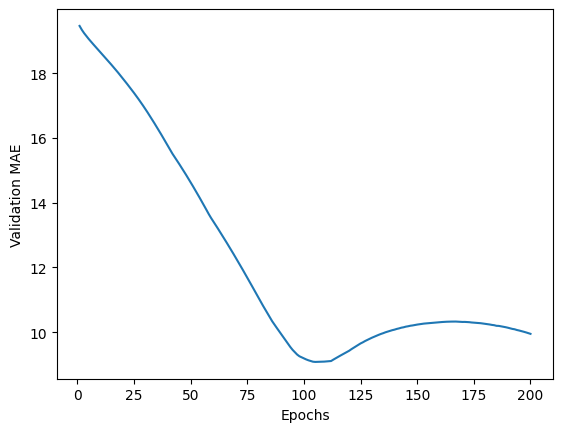

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

Plotting validation scores, excluding the first 10 data points

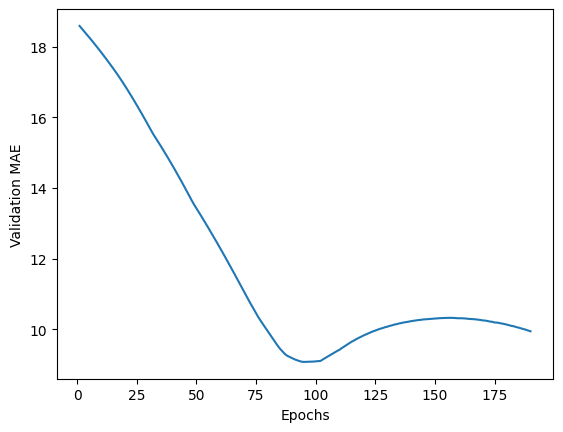

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

Training the final model

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=95, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 1047.0599 - mae: 27.2386


## Результаты нейронка


In [ ]:
test_mae_score

27.238567352294922

In [ ]:
test_data_show = df.iloc[L]
test_data_show

,Product,95% Full Cure 120 C minutes,Tg,Viscosity Initial,Viscosity 2x weeks
5,Omicure U-52,20,119,420,55
15,Monuron,63,132,340,21


In [ ]:
test_targets

array([55, 21])

In [ ]:
predictions = model.predict(test_data)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([10.293737], dtype=float32)

In [ ]:
predictions = model.predict(test_data)
predictions[1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([30.770874], dtype=float32)

In [ ]:

import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from numpy import std


# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(train_data, train_targets)

# Predict the model
pred = xgb_r.predict(test_data)

# RMSE Computation
#rmse = np.sqrt(MSE(test_targets, pred))
#rmse = MSE(test_targets, pred)
mae = MAE(test_targets, pred)
#mae15 = MAE(test_targets, pred)
#print("RMSE : % f" %(rmse))
print("MAE : % f" %(mae))

MAE :  19.863231


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:51:31] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
pred

array([16.361038, 19.9125  ], dtype=float32)

In [ ]:
test_targets

array([55, 21])

In [1]:
pip install mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.0 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176718 sha256=c323520d3663d83cb0d5147ca7b530bfadd43ade82109e31f7ce55e937ed7fa4
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nx-cugraph-cu12 24.10.0 requires networkx>=3.0, but you have networkx 2.8.8 which is incompatible.


In [2]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 50.0 MB/s eta 0:00:00


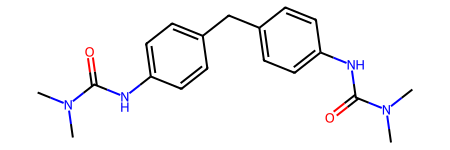

In [31]:
from rdkit import Chem

from mordred import Chi, ABCIndex, Calculator, descriptors

omicure_U_52 = Chem.MolFromSmiles('CN(C)C(=O)NC1=CC=C(C=C1)CC2=CC=C(C=C2)NC(=O)N(C)C')
omicure_U_52






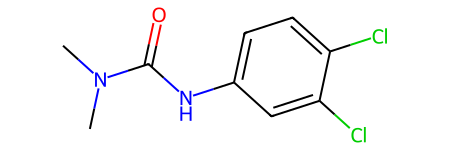

In [32]:
diuron = Chem.MolFromSmiles('O=C(N(C)C)NC(C=C1)=CC(Cl)=C1Cl')
diuron

In [26]:
# create descriptor instance


calc = Calculator(descriptors, ignore_3D=True)
len(Calculator(descriptors, ignore_3D=True, version="1.0.0"))


1612

In [37]:
calc(omicure_U_52)[0:10]

 0,
 0,
 30.901888613762083,
 2.3099136911461158,
 4.619827382292231,
 30.901888613762083,
 1.2360755445504834,
 4.115065933197156]

In [38]:
calc(diuron)[0:10]

 0,
 0,
 16.601661418666875,
 2.292088911711496,
 4.584177823422994,
 16.601661418666875,
 1.1858329584762053,
 3.5269375820735793]